# PELICULAS

## Justificación del uso de datos.
    a)	Cuáles fueron las características que les llamó la atención de los datos. Qué les hizo querer trabajar con ellos: Al buscar la base de datos, queríamos que tuviera información necesaria, variables tanto cualitativas como cuantitativas para hacer las valuaciones pertinentes en cada caso como lo hemos visto en clase, además buscamos un tema de interés y  actualmente a todo mundo le gusta ver películas.
    b)	Qué beneficio encuentran de trabajar con estos datos: Es una información muy detalla y la base de datos es amplia. Gracias a esto nuestras predicciones y resolución de nuestras preguntas de interés pueden ser más acertadas.

###### Abrimos el archivo para visualizar la información:

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib as plt
import seaborn as sns
%matplotlib inline
database = pd.read_csv("C:/Users/USUARIO/Documents/GitHub/MINERIA_DE_DATOS/filmdatabase.csv")
database.head(5)

,filmtv_id,title,year,genre,duration,country,director,actors,avg_vote,votes,description,notes
0,42145,L'arroseur arrosé,1897.0,NaN,49,France,Alice Guy,NaN,6.5,10,NaN,NaN
1,50726,Le voleur invisible,1909.0,Short Movie,432,France,Segundo de Chomón,NaN,7.7,3,NaN,NaN
2,33045,L'inferno,1911.0,Drama,68,"Italy, Great Britain","Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",8.1,24,NaN,NaN
3,52069,Robinet aviatore,1911.0,Short Movie,536,Italy,Luigi Maggi,Marcel Perez,7.3,3,NaN,NaN
4,30074,Les amours de la reine Élisabeth,1912.0,Drama,40,France,"Henri Desfontaines, Louis Mercanton","Sarah Bernhardt, Lou Tellegen, Max Maxudian, J...",5.5,2,NaN,NaN


###### Visualizamos el tamaño de la matriz de información:

In [3]:
database.shape

(52850, 12)

###### Visualizamos los encabezados de nuestras columnas para poder determinar con cuales se va a trabajar:

In [4]:
database.columns

Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'country',
       'director', 'actors', 'avg_vote', 'votes', 'description', 'notes'],
      dtype='object')

###### Así mismo, visualizamos las clases de variables que manipularemos:

In [5]:
database.dtypes

filmtv_id        int64
title           object
year           float64
genre           object
duration         int64
country         object
director        object
actors          object
avg_vote       float64
votes            int64
description     object
notes           object
dtype: object

## DESCRIPCION DE LA BASE DE DATOS
    Se tiene una base de datos en la que son clasificadas 53497 películas.
    Se clasifican de manera cualitativa por género, país, descripción, notas, quien la dirigió, los protagonistas.
    Por otra parte, de manera cuantitativa se comtempla la duración, el año, los votos y el promedio de evaluación.
    Estamos evaluando 10 variables para cada pelicula.
    Entonces, tenemos que nuestra matriz de datos es de 53497x12.

###### Eliminamos las columnas que no ocupamos:

In [6]:
data=database.drop(['filmtv_id','votes','notes','description'],axis=1)
data.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
0,L'arroseur arrosé,1897.0,NaN,49,France,Alice Guy,NaN,6.5
1,Le voleur invisible,1909.0,Short Movie,432,France,Segundo de Chomón,NaN,7.7
2,L'inferno,1911.0,Drama,68,"Italy, Great Britain","Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",8.1
3,Robinet aviatore,1911.0,Short Movie,536,Italy,Luigi Maggi,Marcel Perez,7.3
4,Les amours de la reine Élisabeth,1912.0,Drama,40,France,"Henri Desfontaines, Louis Mercanton","Sarah Bernhardt, Lou Tellegen, Max Maxudian, J...",5.5


###### Vemos si existen espacios nulos en la base datos:

In [7]:
data.isnull().sum()

title          0
year          12
genre        202
duration       0
country       49
director      64
actors      2960
avg_vote       0
dtype: int64

###### Eliminamos los espacios nulos:

In [8]:
data.isnull().sum()

title          0
year          12
genre        202
duration       0
country       49
director      64
actors      2960
avg_vote       0
dtype: int64

In [9]:
films=data.dropna()
films.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
2,L'inferno,1911.0,Drama,68,"Italy, Great Britain","Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",8.1
3,Robinet aviatore,1911.0,Short Movie,536,Italy,Luigi Maggi,Marcel Perez,7.3
4,Les amours de la reine Élisabeth,1912.0,Drama,40,France,"Henri Desfontaines, Louis Mercanton","Sarah Bernhardt, Lou Tellegen, Max Maxudian, J...",5.5
5,Quo vadis?,1912.0,Drama,120,Italy,Enrico Guazzoni,"Amleto Novelli, Gustavo Serena, Lea Giunchi, C...",9.5
6,"From the Manger to the Cross; or, Jesus of Naz...",1912.0,Biblical,71,United States,Sidney Olcott,"Robert Henderson Bland, Percy Dyer, Gene Gaunt...",6.0


###### Convertimos la columna de años a enteros porque aparece como flotante:

In [10]:
films.year.astype("int")

2        1911
3        1911
4        1912
5        1912
6        1912
         ... 
52832    2018
52833    2018
52834    2018
52835    2018
52837    2018
Name: year, Length: 49611, dtype: int32

## MANIPULACIÓN DE LA BASE DE DATOS
    Lo primero que realizamos es la eliminación de las columnas que no vamos a ocupar.
    Para esta base de datos eliminamos cuatro columnas. Empezamos con la columna del id, se elimina ya que esta no tiene importacia al igual que la columna de notas. La columna de votos es innecesaria pues solo cuenta cuantas personas votaron y lo que realmente nos interesa es el promedio de dicha votación y también eliminamos la columna de descripción ya que cuenta con muchos valores nulos y si la tomamos en cuenta nuestra base de datos quedaría reducida a más del 50%.
    Ya después, eliminamos los datos nulos restantes. Y aún nos quedan 50180 datos con los cuales podemos trabajar.
    

###### Procedemos a ver con cuantos valores contamos en cada columna para realizar una clasificación:

In [11]:
films.genre.unique()

array(['Drama', 'Short Movie', 'Biblical', 'Crime', 'Adventure',
       'Fantasy', 'Comedy', 'History', 'Mélo', 'Horror', 'Documentary',
       'Thriller', 'Western', 'War', 'Grotesque', 'Action', 'Biography',
       'Gangster', 'Romantic', 'Mythology', 'Musical', 'Spy', 'Animation',
       'Noir', 'Sperimental', 'Super-hero', 'Sport'], dtype=object)

###### Clasificamos los datos por género:

In [12]:
fDrama=films[films['genre']=='Drama']
fDrama.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
1,18 anni tra una settimana,1991.0,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",7.0
6,A ciascuno il suo,1967.0,Drama,93,Italy,Elio Petri,"Gian Maria Volonté, Irene Papas, Gabriele Ferz...",7.8
9,At Close Range,1986.0,Drama,115,United States,James Foley,"Christopher Walken, Sean Penn, Chris Penn, Mar...",7.5
12,Sleeping with the Enemy,1990.0,Drama,96,United States,Joseph Ruben,"Julia Roberts, Patrick Bergin, Kevin Anderson,...",5.1
20,Rouge baiser,1985.0,Drama,110,France,Vera Belmont,"Charlotte Valandrey, Lambert Wilson, Laurent T...",4.0


In [13]:
fRomantic=films[films['genre']=='Romantic']
fRomantic.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
2,Ride a Wild Pony,1976.0,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.5
61,Made in Heaven,1987.0,Romantic,102,United States,Alan Rudolph,"Timothy Hutton, Kelly McGillis, Maureen Staple...",5.7
87,Goodbye Mr. Chips!,1939.0,Romantic,114,United States,Sam Wood,"Robert Donat, Greer Garson, Paul Henreid, Terr...",7.3
248,Always,1989.0,Romantic,121,United States,Steven Spielberg,"Richard Dreyfuss, Holly Hunter, Brad Johnson, ...",6.3
258,Daisy Kenyon,1947.0,Romantic,99,United States,Otto Preminger,"Joan Crawford, Henry Fonda, Dana Andrews",7.0


In [14]:
fComedy=films[films['genre']=='Comedy']
fComedy.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
3,Diner,1982.0,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.2
4,A che servono questi quattrini?,1942.0,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.8
11,Does This Mean We are Married?,1990.0,Comedy,90,United States,Carol Wiseman,"Patsy Kensit, Stéphane Freiss, Mouss Diouf, An...",4.0
15,Make Mine Mink,1960.0,Comedy,100,Great Britain,Robert Asher,"Terry-Thomas, Athene Seyler, Hattie Jacques, B...",8.0
17,A mezzanotte va la ronda del piacere,1975.0,Comedy,100,Italy,Marcello Fondato,"Claudia Cardinale, Monica Vitti, Vittorio Gass...",5.9


In [15]:
fSpy=films[films['genre']=='Spy']
fSpy.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
5,The Uranian Conspiracy,1978.0,Spy,117,"Italy, Germany, Israel","Gianfranco Baldanello, Menahem Golan","Fabio Testi, Janet Agren, Assaf Dayan, Siegfri...",5.0
47,Charlie Muffin,1979.0,Spy,109,Great Britain,Jack Gold,"David Hemmings, Sam Wanamaker, Jennie Linden, ...",6.1
106,The Defector,1966.0,Spy,100,United States,Raoul Levy,"Montgomery Clift, Hardy Krüger, Macha Meril, C...",4.8
120,On Her Majesty's Secret Services,1969.0,Spy,140,Great Britain,Peter R. Hunt,"George Lazenby, Diana Rigg, Telly Savalas, Gab...",7.3
121,From Russia with Love,1963.0,Spy,115,Great Britain,Terence Young,"Sean Connery, Daniela Bianchi, Pedro Armendari...",7.4


In [16]:
fCrime=films[films['genre']=='Crime']
fCrime.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
7,Dead-Bang,1989.0,Crime,109,United States,John Frankenheimer,"Don Johnson, Penelope Ann Miller, William Fors...",6.0
40,...a tutte le auto della polizia...,1975.0,Crime,100,Italy,Mario Caiano,"Antonio Sabato, Luciana Paluzzi, Enrico Maria ...",5.5
41,A tutte le volanti,1991.0,Crime,85,Italy,Romolo Guerrieri,"Tony Palazzo, Massimiliano Pazzaglia",4.0
73,Action Jackson,1988.0,Crime,97,United States,Craig R. Baxley,"Carl Weathers, Craig T. Nelson, Vanity, Sharon...",5.1
108,Internal Affairs,1990.0,Crime,112,United States,Mike Figgis,"Richard Gere, Andy Garcia, Nancy Travis, Lauri...",6.5


In [17]:
fThriller=films[films['genre']=='Thriller']
fThriller.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
8,A... come assassino,1966.0,Thriller,80,Italy,Ray Morrison (Angelo Dorigo),"Alan Steel, Mary Arden, Sergio Ciani, Ivano Da...",6.5
13,Love Kills,1991.0,Thriller,100,United States,Brian Grant,"Virginia Madsen, Lenny Von Dohlen, Jim Metzler...",8.0
23,Main pleine,1989.0,Thriller,89,France,Laurent Heynemann,"Christine Pascal, Gérard Darmon, Ninetto Davol...",6.0
31,Johnny O'Clock,1947.0,Thriller,95,United States,Robert Rossen,"Dick Powell, Evelyn Keyes, Lee J. Cobb, Ellen ...",7.9
43,You'll Like My Mother,1973.0,Thriller,94,United States,Lamont Johnson,"Patty Duke, Rosemary Murphy, Richard Thomas, S...",8.0


In [18]:
fAdventure=films[films['genre']=='Adventure']
fAdventure.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
10,A Ghentar si muore facile,1968.0,Adventure,101,Italy,Leon Klimovsky,"George Hilton, Ennio Girolami, Marta Padovan, ...",5.5
30,A qualsiasi prezzo,1968.0,Adventure,94,Italy,Emilio Miraglia,"Walter Pidgeon, Ira Fürstenberg, Klaus Kinski,...",4.0
50,The Deep,1977.0,Adventure,130,United States,Peter Yates,"Nick Nolte, Jacqueline Bisset, Robert Shaw, El...",5.2
86,Ring of Bright Water,1969.0,Adventure,104,Great Britain,Jack Couffer,"Bill Travers, Virgina McKenna, Peter Jeffrey, ...",4.0
115,Africa Express,1975.0,Adventure,95,Italy,Michele Lupo,"Giuliano Gemma, Ursula Andress, Jack Palance, ...",5.5


In [19]:
fDocumentary=films[films['genre']=='Documentary']
fDocumentary.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
14,In Bed With Madonna,1990.0,Documentary,111,United States,Alek Keshishian,"Madonna, Warren Beatty, Sandra Bernhard, Anton...",5.1
368,And the Pursuit of Happiness,1986.0,Documentary,91,United States,Louis Malle,Attori non professionisti,5.0
443,L'antimiracolo,1963.0,Documentary,87,Italy,Elio Piccon,Attori non professionisti,6.8
595,Driving Me Crazy,1990.0,Documentary,85,United States,John Tutteltaub,"Thomas Gottschaik, Billy Dee Williams, Dom De ...",6.0
983,Ça ira - Il fiume della rivolta,1965.0,Documentary,94,Italy,Tinto Brass,Attori non professionisti,6.4


In [20]:
fHorror=films[films['genre']=='Horror']
fHorror.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
16,Bowery at Midnight,1942.0,Horror,62,United States,Wallace Fox,"Bela Lugosi, John Archer, Wanda McKay, Dave O'...",5.8
161,Die Nackt und der Satan,1959.0,Horror,92,Germany,Victor Trivas,"Michel Simon, Horst Frank, Karin Kernke",7.4
187,Nightwing,1979.0,Horror,105,United States,Arthur Hiller,"Nick Mancuso, David Warner, Kathryn Harrold",5.3
306,The Amityville Horror,1979.0,Horror,116,United States,Stuart Rosenberg,"James Brolin, Margot Kidder, Rod Steiger, Murr...",6.1
363,Ghoulies To the College,1989.0,Horror,87,United States,John Carl Buechler,"Kevin McCarthy, Evan MacKenzie, Eva La Rue",5.0


In [21]:
fAction=films[films['genre']=='Action']
fAction.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
18,Mr. Majestyk,1974.0,Action,105,United States,Richard Fleischer,"Charles Bronson, Linda Cristal, Al Lettieri, L...",6.0
24,Warning Sign,1985.0,Action,99,United States,Hal Barwood,"Sam Waterston, Kathleen Quinlan, Yaphet Kotto,...",4.5
28,Free Fighter,1990.0,Action,88,"United States, China",Liu Chia Yung,"Cynthia Rothrock, Mark Huston, Tong Chung, Shi...",7.0
151,Airport '77,1977.0,Action,110,United States,Jerry Jameson,"Jack Lemmon, James Stewart, Lee Grant, Brenda ...",4.7
213,The Blue Lightning,1986.0,Action,95,Australia,Lee Philips,"Sam Elliott, Rebecca Gilling, Robert Culp, Joh...",6.0


In [22]:
fWestern=films[films['genre']=='Western']
fWestern.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
38,The Appaloosa,1966.0,Western,98,United States,Sidney J. Furie,"Marlon Brando, Anjanette Comer, John Saxon, Em...",7.0
76,Mail Order Bride,1963.0,Western,90,United States,Burt Kennedy,"Buddy Ebsen, Keir Dullea, Warren Oates, Marie ...",6.3
141,Hostile Guns,1967.0,Western,91,United States,R. G. Springsteen,"George Montgomery, Yvonne De Carlo, Tab Hunter",5.0
143,Die Flusspiraten vom Mississippi,1964.0,Western,86,Germany,Jürgen Roland,"Brad Harris, Tony Kendall, Hansjörg Felmy, Sab...",4.5
160,Drums Across the River,1954.0,Western,78,United States,Nathan Juran,"Audie Murphy, Lisa Gaye, Walter Brennan, Lyle ...",8.0


In [23]:
fHistory=films[films['genre']=='History']
fHistory.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
52,L'abito nero da sposa,1945.0,History,90,Italy,Luigi Zampa,"Fosco Giachetti, Jacqueline Laurent, Carlo Tam...",7.0
205,Anthony and Cleopatra,1973.0,History,134,United States,Charlton Heston,"Charlton Heston, Hildegard Neil, Eric Porter, ...",5.0
415,Anna Boleyn,1920.0,History,102,Germany,Ernst Lubitsch,"Henny Porten, Emil Jannings",7.3
416,Anne of the Thousand Days,1970.0,History,144,United States,Charles Jarrott,"Richard Burton, Geneviève Bujold, Irene Papas",6.8
1055,Canaris,1954.0,History,115,Germany,Alfred Weidenmann,"O.E. Hasse, Adrian Hoven, Martin Held, Barbara...",6.0


In [24]:
fBiography=films[films['genre']=='Biography']
fBiography.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
53,Abe Lincoln in Illinois,1940.0,Biography,110,United States,John Cromwell,"Raymond Massey, Ruth Gordon, Gene Lockhart, Ma...",6.3
94,Beloved Infidel,1959.0,Biography,123,United States,Henry King,"Gregory Peck, Deborah Kerr, Eddie Albert, Phil...",5.8
185,Alfred the Great,1969.0,Biography,120,Great Britain,Clive Donner,"David Hemmings, Prunella Ransome, Michael York...",8.1
388,An Angel at My Table,1990.0,Biography,158,"New Zealand, Australia, Great Britain",Jane Campion,"Kerry Fox, Alexia Keogh, Karen Fergusson, Iris...",7.6
447,Antonio di Padova,1949.0,Biography,90,Italy,Piero Francisci,"Aldo Fiorelli, Aldo Fabrizi, Silvana Pampanini...",2.3


In [25]:
fMusical=films[films['genre']=='Musical']
fMusical.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
54,Absolute Beginners,1986.0,Musical,100,Great Britain,Julien Temple,"Patsy Kensit, David Bowie, Eddie O'Connell, Ja...",6.3
149,Aida,1953.0,Musical,97,Italy,Clemente Fracassi,"Sophia Loren, Lois Maxwell, Luciano Della Marr...",6.0
218,Summer Stock,1950.0,Musical,109,United States,Charles Walters,"Judy Garland, Gene Kelly, Eddie Bracken, Marjo...",7.0
234,High Society,1956.0,Musical,107,United States,Charles Walters,"Grace Kelly, Bing Crosby, Frank Sinatra, Louis...",7.0
239,Altissima pressione,1965.0,Musical,97,Italy,Enzo Trapani,"Dino, Gianni Morandi, Lucio Dalla, Peppino Gag...",3.0


In [26]:
fFantasy=films[films['genre']=='Fantasy']
fFantasy.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
55,The Abyss,1989.0,Fantasy,138,United States,James Cameron,"Ed Harris, Mary Elizabeth Mastrantonio, Michae...",7.2
146,City Limits,1985.0,Fantasy,78,United States,Aaron Lipstadt,"Darrell Larson, John Stockwell, Kim Cattrall",3.5
171,Steel Dawn,1987.0,Fantasy,100,United States,Lance Hool,"Patrick Swayze, Lisa Niemi, Christopher Neame,...",4.8
188,The Wizard of Baghdad,1960.0,Fantasy,92,United States,George Sherman,"Dick Shawn, Diane Baker, Barry Coe, John Van D...",6.0
196,Alien,1979.0,Fantasy,115,"Great Britain, United States",Ridley Scott,"Sigourney Weaver, Tom Skerritt, Harry Dean Sta...",8.6


In [27]:
fWar=films[films['genre']=='War']
fWar.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
59,Es geschah am 20. Juli,1955.0,War,75,Germany,Georg Wilhelm Pabst,"Bernhard Wicki, Karl Ludwig Diehl, Carl Wery, ...",6.5
69,Achtung! Banditi!,1951.0,War,100,Italy,Carlo Lizzani,"Gina Lollobrigida, Andrea Checchi, Vittorio Du...",7.0
81,Farewell to the King,1988.0,War,107,United States,John Milius,"Nick Nolte, Nigel Havers, James Fox, Frank McR...",6.8
82,A Farewell to Arms,1932.0,War,78,United States,Frank Borzage,"Gary Cooper, Helen Hayes, Adolphe Menjou, Mary...",6.7
113,The Valiant,1961.0,War,90,"Italy, Great Britain",Roy Ward Baker,"Ettore Manni, John Mills, Roberto Risso, Rober...",4.8


In [28]:
fGrotesque=films[films['genre']=='Grotesque']
fGrotesque.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
71,Water,1985.0,Grotesque,97,Great Britain,Dick Clement,"Michael Caine, Valerie Perrine, Brenda Vaccaro...",6.7
166,Checking Out,1988.0,Grotesque,99,Great Britain,David Leland,"Jeff Daniels, Melanie Myron, Allan Havey",8.0
273,Amarcord,1974.0,Grotesque,125,Italy,Federico Fellini,"Bruno Zanin, Pupella Maggio, Armando Brancia, ...",8.5
407,Animali metropolitani,1987.0,Grotesque,84,Italy,Steno,"Donald Pleasence, Senta Berger, Ninetto Davoli...",3.7
451,Una storia moderna - L'ape regina,1963.0,Grotesque,87,Italy,Marco Ferreri,"Marina Vlady, Ugo Tognazzi, Linda Sini, Riccar...",7.4


In [29]:
fGangster=films[films['genre']=='Gangster']
fGangster.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
157,Al Capone,1959.0,Gangster,104,United States,Richard Wilson,"Nehemiah Persoff, Rod Steiger, Fay Spain, Jame...",6.5
702,Banditi a Milano,1968.0,Gangster,102,Italy,Carlo Lizzani,"Gian Maria Volonté, Don Backy, Tomas Milian, R...",7.7
877,Bonnie and Clyde,1967.0,Gangster,111,United States,Arthur Penn,"Warren Beatty, Faye Dunaway, Gene Hackman, Mic...",8.6
887,Borsalino,1970.0,Gangster,131,"France, Italy",Jacques Deray,"Alain Delon, Jean-Paul Belmondo, Catherine Rou...",7.4
1366,La città gioca d'azzardo,1974.0,Gangster,101,Italy,Sergio Martino,"Luc Merenda, Dayle Haddon, Corrado Pani, Lino ...",4.8


In [30]:
fAnimation=films[films['genre']=='Animation']
fAnimation.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
224,Allegro non troppo,1977.0,Animation,85,Italy,Bruno Bozzetto,"Maurizio Nichetti, Maurizio Micheli, Maria Lui...",7.8
1278,Who Framed Roger Rabbit,1988.0,Animation,105,United States,Robert Zemeckis,"Bob Hoskins, Joanna Cassidy, Christopher Lloyd",7.8
6400,Thre Three Caballeros,1945.0,Animation,70,United States,Walt Disney,"Carmen Molina, Aurora Miranda",7.6
20290,Waking Life,2001.0,Animation,97,United States,Richard Linklater,"Wiley Wiggins, Ethan Hawke, Julie Delpy, Steve...",6.0
22878,Looney Tunes: Back in Action,2003.0,Animation,91,United States,Joe Dante,"Brendan Fraser, Timothy Dalton, Steve Martin, ...",6.8


In [31]:
fMelo=films[films['genre']=='Mélo']
fMelo.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
233,High Tide at Noon,1957.0,Mélo,111,Great Britain,Philip Leacock,"Betta St. John, Michael Craig, Patrick McGooha...",6.0
343,Madeleine,1950.0,Mélo,114,Great Britain,David Lean,"Ann Todd, Leslie Banks, Elizabeth Sellars, Ivo...",7.1
405,A Stolen Life,1946.0,Mélo,103,United States,Curtis Bernhardt,"Bette Davis, Glenn Ford, Walter Brennan, Dane ...",7.1
406,"Heaven Knows, Mr.Allison",1957.0,Mélo,107,United States,John Huston,"Robert Mitchum, Deborah Kerr",7.6
411,Possessed,1947.0,Mélo,108,United States,Curtis Bernhardt,"Joan Crawford, Van Heflin, Raymond Massey, Ger...",7.9


In [32]:
fMythology=films[films['genre']=='Mythology']
fMythology.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
350,Serpent of the Nile,1953.0,Mythology,81,United States,William Castle,"Rhonda Fleming, William Lundigan, Raymond Burr...",6.0
351,Gli amori di Ercole,1959.0,Mythology,98,Italy,Carlo Ludovico Bragaglia,"Jayne Mansfield, Mickey Hargitay, Massimo Sera...",4.3
484,The Argonauts,1963.0,Mythology,95,United States,Don Chaffey,"Todd Armstrong, Nancy Kovac, Gene Raymond",7.2
523,Arrivano i Titani,1962.0,Mythology,120,Italy,Duccio Tessari,"Giuliano Gemma, Antonella Lualdi, Pedro Armend...",7.4
1428,Il Colosso di Rodi,1961.0,Mythology,120,Italy,Sergio Leone,"Conrado Sanmartin, Rory Calhoun, Lea Massari, ...",5.6


In [33]:
fNoir=films[films['genre']=='Noir']
fNoir.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
535,Classe tous risques,1960.0,Noir,110,"France, Italy",Claude Sautet,"Lino Ventura, Jean-Paul Belmondo, Sandra Milo,...",7.5
555,Les bras de la nuit,1961.0,Noir,90,France,Jacques Guymont,"Danielle Darrieux, Roger Hanin, Eva Damien",6.5
652,Killer's Kiss,1955.0,Noir,67,United States,Stanley Kubrick,"Frank Silvera, Jamie Smith, Irene Kane, Jerry ...",7.2
660,Kiss Me Deadly,1955.0,Noir,105,United States,Robert Aldrich,"Ralph Meeker, Albert Dekker, Cloris Leachman, ...",8.0
1298,The Glass Key,1942.0,Noir,85,United States,Stuart Heisler,"Alan Ladd, Brian Donlevy, Veronica Lake, Bonit...",7.1


In [36]:
fSuperHero=films[films['genre']=='Super-hero']
fSuperHero.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
736,Batman,1989.0,Super-hero,124,United States,Tim Burton,"Jack Nicholson, Michael Keaton, Kim Basinger, ...",7.5
1475,Come rubare la corona d'Inghilterra,1967.0,Super-hero,93,Italy,Terence Hathaway (Sergio Grieco),"Roger Browne, Dominique Boschero, Eduardo Fajardo",4.3
6091,Supergirl,1985.0,Super-hero,108,United States,Jeannot Szwarc,"Helen Slater, Faye Dunaway, Peter O'Toole, Mia...",4.1
6092,Superman III,1983.0,Super-hero,121,United States,Richard Lester,"Christopher Reeve, Richard Pryor, Jackie Coope...",6.4
6093,Superman II,1980.0,Super-hero,126,"United States, Great Britain",Richard Lester,"Christopher Reeve, Margot Kidder, Gene Hackman...",7.3


In [35]:
fBiblical=films[films['genre']=='Biblical']
fBiblical.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
791,Ben Hur,1959.0,Biblical,212,United States,William Wyler,"Charlton Heston, Stephen Boyd, Jack Hawkins, H...",8.0
1828,The Ten Commandments,1956.0,Biblical,220,United States,Cecil B. DeMille,"Charlton Heston, Yul Brynner, Anne Baxter, Edw...",8.2
2188,Erode il Grande,1958.0,Biblical,95,Italy,Arnaldo Genoino,"Edmund Purdom, Sylvia Lopez, Sandra Milo, Elen...",4.3
2737,Giuditta e Oloferne,1958.0,Biblical,100,Italy,Fernando Cerchio,"Massimo Girotti, Isabelle Corey, Renato Baldin...",4.3
2751,Giuseppe venduto dai fratelli,1961.0,Biblical,102,Italy,Irving Rapper,"Geoffrey Horne, Belinda Lee, Charles Borromel,...",4.6


In [37]:
fSport=films[films['genre']=='Sport']
fSport.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
2531,Escape to Victory,1981.0,Sport,113,United States,John Huston,"Michael Caine, Max Von Sydow, Sylvester Stallo...",7.5
31102,You've Got a Friend,2007.0,Sport,120,United States,James A. Contner,"John Schneider, Dylan McLaughlin, Jason Brooks...",6.0
31986,Fighting,2009.0,Sport,105,United States,Dito Montiel,"Channing Tatum, Terrence Howard, Luis Guzmán, ...",5.9
36819,Slow Moe,2010.0,Sport,89,United States,Timothy J. Nelson,"Scotty Leavenworth, AJ Michalka, Marc John Jef...",7.0
37250,Pretty Tough,2011.0,Sport,104,United States,Stewart Hendler,"Adelaide Kane, Crystal Young, Matthew Florida,...",3.0


In [38]:
fSperimental=films[films['genre']=='Sperimental']
fSperimental.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
17291,Noi e il Duca,1999.0,Sperimental,87,Italy,"Daniele Ciprì, Franco Maresco",Duke Ellington,8.0
19391,Flaming Creatures,1963.0,Sperimental,45,United States,Jack Smith,"Joel Markman, Mario Montez",6.9
19691,A mosca cieca,1966.0,Sperimental,98,Italy,Romano Scavolini,"Carlo Cecchi, Laura Troschel, Joseph Valdambri...",6.2
21206,Normal Love,1963.0,Sperimental,105,United States,Jack Smith,"Diana Baccus, Mario Montez, Francis Francine, ...",5.5
21249,Un homme sans l'Occident,2002.0,Sperimental,100,France,Raymond Depardon,"Ali Hamit, Wodji Ouardougou",8.0


In [39]:
fShortMovie=films[films['genre']=='Short Movie']
fShortMovie.head(5)

,title,year,genre,duration,country,director,actors,avg_vote
30251,Haze,2005.0,Short Movie,49,Japan,Shinya Tsukamoto,"Shinya Tsukamoto, Kahori Fujii, Takahiro Kanda...",7.6
36969,Poslovi konzula Dorgena,1933.0,Short Movie,185,Yugoslavia,Oktavijan Miletic,"Šime Marov, Ivan Alpi-Rauch",8.0
38400,Robinet aviatore,1911.0,Short Movie,536,Italy,Luigi Maggi,Marcel Perez,7.3
41107,D - Non diversi giorni si pensa splendessero a...,1970.0,Short Movie,40,Italy,"Anna Lajolo, Guido Lombardi","Sebastiano Bernardello, Sandra D'Olif, Karl Ba...",7.0
43517,"Roma, Napoli, Venezia… in un crescendo rossiniano",2014.0,Short Movie,40,"Italy, France",Lina Wertmüller,"Elio, Giuliana De Sio, Claudia Puglia",5.5


## CLASIFICACIÓN DE DATOS
    Si al momento de clasificar los datos, lo hubiéramos realizado por año, país o director, la cantidad de clases obtenidas serían demasiadas, esto provocaría que al momento de evaluarse los datos queden más espárcidos.
    Es por eso, que la clasificación elegida es por género.
    En dicha clasificación se obtienen en total veintisiete géneros distintos de peliculas.
    Los diez géneros que sobresalen en nuestra base de datos son:
    drama, comedia, thriller, acción, horror, aventuras, fantasía, western, documentales y románticas.

##### Vemos de que año a que año se encuentran las películas utilizando max and min de la columna year:

In [41]:
films['year'].min()

1911.0

In [91]:
films['year'].max()

2019.0

##### Hacemos una descripción estadística de la duración de las películas y de la votación promedio:

In [86]:
films['duration'].describe()

count    50180.000000
mean        99.190554
std         34.548702
min         40.000000
25%         90.000000
50%         95.000000
75%        105.000000
max       5280.000000
Name: duration, dtype: float64

In [87]:
films['avg_vote'].describe()

count    50180.000000
mean         5.813984
std          1.512986
min          0.500000
25%          4.900000
50%          6.000000
75%          7.000000
max         10.000000
Name: avg_vote, dtype: float64

##### Visualizamos la correlación de nuestra base de datos, así como la covarianza, tomando en cuenta la duración y el voto promedio.

In [55]:
films.corr()

,year,duration,avg_vote
year,1.000000,0.057331,-0.169177
duration,0.057331,1.000000,0.087808
avg_vote,-0.169177,0.087808,1.000000


In [94]:
films.cov()

,year,duration,avg_vote
year,529.311487,45.569885,-5.888870
duration,45.569885,1193.612825,4.589858
avg_vote,-5.888870,4.589858,2.289126


## ESTADISTICAS

# Gráficos

##### Realizamos un gráfico para visualizar los géneros más vistos en el séptimo arte.

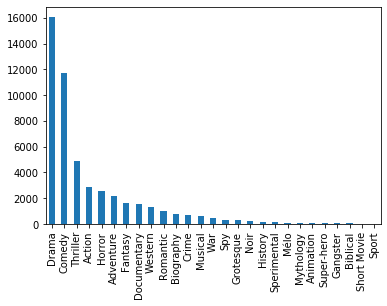

In [29]:
films['genre'].value_counts().plot.bar()

##### Tomamos en cuenta los cinco g'eneros más vistos y evaluamos el promedio de votos de esos cinco géneros.

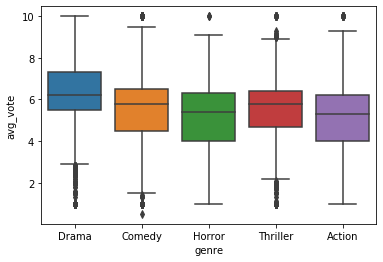

In [42]:
fdb= films[films.genre.isin(films.genre.value_counts().head(5).index)]
sns.boxplot(x='genre', y='avg_vote', data=fdb)

##### Procedemos con dos maneras de visualizar la puntuación de las películas.

###### Gráfico de línea

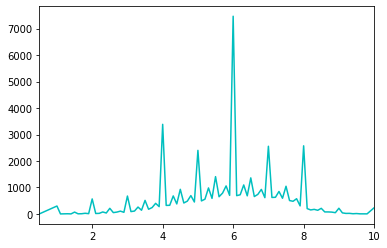

In [16]:
films['avg_vote'].value_counts().sort_index().plot.line(color='c')

###### Histograma

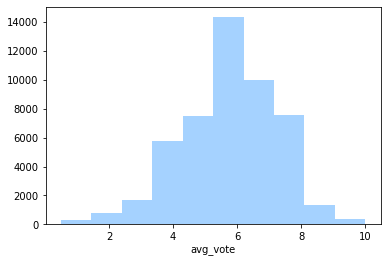

In [33]:
sns.distplot(films['avg_vote'],bins=10,kde=False,color='DodgerBlue')

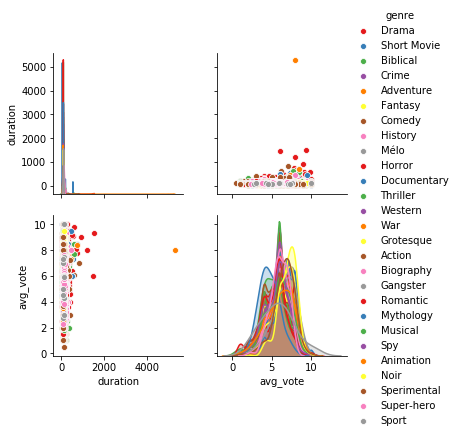

In [45]:
g=sns.pairplot(films,vars=['duration','avg_vote'], hue='genre',palette='Set1')
g

## PREGUNTAS DE INTERÉS
    ¿Cuál será la cantidad de películas que se estrenarán en el 2019 por género?
    ¿Qué características tienen las películas con mayor rating (considerando nacionalidad, director, género y reparto)?
    